In [37]:
from xmltodict import parse
from urllib.request import urlopen
from datetime import *
from zipfile import ZipFile
from io import BytesIO

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import pandas as pd
import json
import yaml
import scipy.stats as stats
import numpy as np

# QUESTION 1

In [2]:
data_may = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv')
data_january = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv')
data_september = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv')
data_june = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv')
data_april = pd.read_csv('https://data.ibb.gov.tr/datastore/dump/75e25417-36df-4822-8a18-578f0f7a584a?bom=True')
data_august = pd.read_csv('https://data.ibb.gov.tr/datastore/dump/a195a42f-727a-4f1e-ad55-471306788c99?bom=True')

## Question 1.1

In [3]:
def total_hours(dfs, calctype):
    df = dfs.copy()
    df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], infer_datetime_format=True)
    arr1 = df.groupby([df['DATE_TIME'].dt.hour, df[calctype]]).NUMBER_OF_PASSENGER.sum()
    df1 = pd.DataFrame(arr1)
    return df1

### Total hourly uses of different modes of transports in January 2021

In [4]:
dfjport = total_hours(data_january, 'TRANSPORT_TYPE_DESC' )
dfjport

NUMBER_OF_PASSENGER
DATE_TIME TRANSPORT_TYPE_DESC                     
0         DENİZ                                145
          KARAYOLU                           22597
          RAY                                 8450
1         DENİZ                                 87
          KARAYOLU                            5912
...                                            ...
22        KARAYOLU                          261078
          RAY                               165771
23        DENİZ                               1326
          KARAYOLU                          107228
          RAY                                89516

[72 rows x 1 columns]

### Total hourly uses of different modes of transports in May 2021

In [5]:
dfmport = total_hours(data_may, 'TRANSPORT_TYPE_DESC' )
dfmport

NUMBER_OF_PASSENGER
DATE_TIME TRANSPORT_TYPE_DESC                     
0         DENİZ                                 15
          KARAYOLU                            1794
          RAY                                   87
1         DENİZ                                  8
          KARAYOLU                             570
...                                            ...
22        KARAYOLU                           19769
          RAY                                 1566
23        DENİZ                                100
          KARAYOLU                            7255
          RAY                                  395

[72 rows x 1 columns]

### Depending on the plots from the 2nd part of the question, we can see that usage is decreased considerably. That can be interpreted as the lockdown has affected the usage  between these two months. However, if you look at the plots one can state that usage pattern of different types of transportations are used in similar patterns during the day

## QUESTION 1.2

### Total hourly uses of different transfer types in June 2020

In [6]:
dfjfer = total_hours(data_june, 'TRANSFER_TYPE' )
dfjfer

NUMBER_OF_PASSENGER
DATE_TIME TRANSFER_TYPE                     
0         AKTARMA                      11823
          NORMAL                      150355
1         AKTARMA                        133
          NORMAL                       34213
2         AKTARMA                          1
          NORMAL                       14752
3         NORMAL                        9123
4         AKTARMA                         11
          NORMAL                       13614
5         AKTARMA                       4933
          NORMAL                      362206
6         AKTARMA                     179819
          NORMAL                     2633377
7         AKTARMA                     538744
          NORMAL                     5791437
8         AKTARMA                     706835
          NORMAL                     5762988
9         AKTARMA                     623922
          NORMAL                     3671724
10        AKTARMA                     592951
          NORMAL                     2975091
11        AKTARMA                     628314
          NORMAL                     2935266
12        AKTARMA                     643617
          NORMAL                     3044991
13        AKTARMA                     690366
          NORMAL                     3282567
14        AKTARMA                     762234
          NORMAL                     3522323
15        AKTARMA                     811606
          NORMAL                     3825496
16        AKTARMA                     813135
          NORMAL                     4222818
17        AKTARMA                     839167
          NORMAL                     5437893
18        AKTARMA                     913768
          NORMAL                     6288631
19        AKTARMA                     835717
          NORMAL                     5094871
20        AKTARMA                     612774
          NORMAL                     3433638
21        AKTARMA                     415075
          NORMAL                     2342703
22        AKTARMA                     282750
          NORMAL                     1674166
23        AKTARMA                     130665
          NORMAL                      766942

### Total hourly uses of different transfer types in June 2020

In [7]:
dfsfer = total_hours(data_september, 'TRANSFER_TYPE' )
dfsfer

NUMBER_OF_PASSENGER
DATE_TIME TRANSFER_TYPE                     
0         AKTARMA                      19104
          NORMAL                      248258
1         AKTARMA                        214
          NORMAL                       65694
2         AKTARMA                         36
          NORMAL                       34857
3         AKTARMA                         28
          NORMAL                       19972
4         AKTARMA                         26
          NORMAL                       28127
5         AKTARMA                       5820
          NORMAL                      430161
6         AKTARMA                     186911
          NORMAL                     3313527
7         AKTARMA                     627312
          NORMAL                     7854819
8         AKTARMA                     896402
          NORMAL                     8186398
9         AKTARMA                     798011
          NORMAL                     5162148
10        AKTARMA                     773068
          NORMAL                     4093676
11        AKTARMA                     836222
          NORMAL                     4155954
12        AKTARMA                     907995
          NORMAL                     4722597
13        AKTARMA                     998688
          NORMAL                     5205054
14        AKTARMA                    1118500
          NORMAL                     5449542
15        AKTARMA                    1161270
          NORMAL                     5572206
16        AKTARMA                    1121018
          NORMAL                     6178924
17        AKTARMA                    1156014
          NORMAL                     7793788
18        AKTARMA                    1255783
          NORMAL                     9064370
19        AKTARMA                    1154679
          NORMAL                     7358941
20        AKTARMA                     805283
          NORMAL                     4498139
21        AKTARMA                     504194
          NORMAL                     3011362
22        AKTARMA                     345314
          NORMAL                     2426299
23        AKTARMA                     183830
          NORMAL                     1203055

## QUESTION 1.3


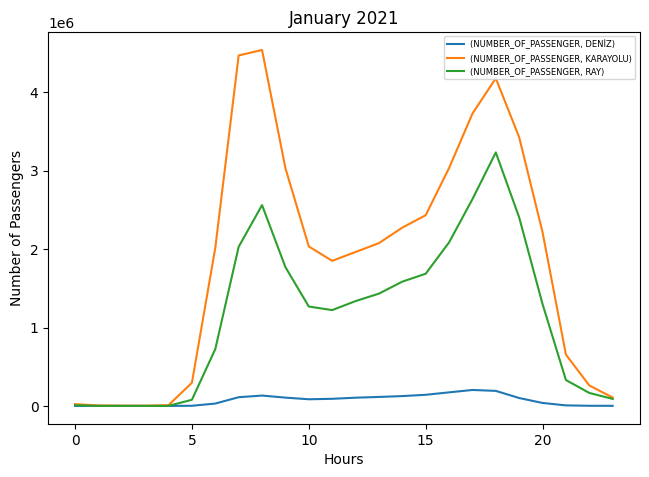

In [8]:
dfjport.unstack().plot()
plt.tight_layout()
plt.title('January 2021')
plt.xlabel('Hours')
plt.ylabel('Number of Passengers')
plt.legend(fontsize = 6)

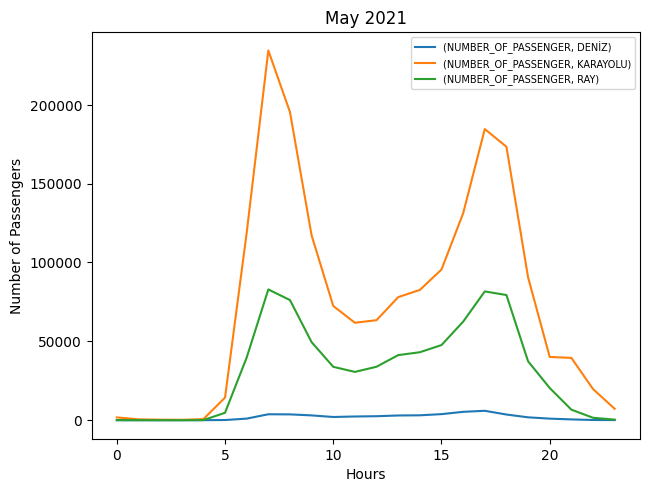

In [9]:
dfmport.unstack().plot()
plt.tight_layout()
plt.title('May 2021')
plt.xlabel('Hours')
plt.ylabel('Number of Passengers')
plt.legend(fontsize = 7)

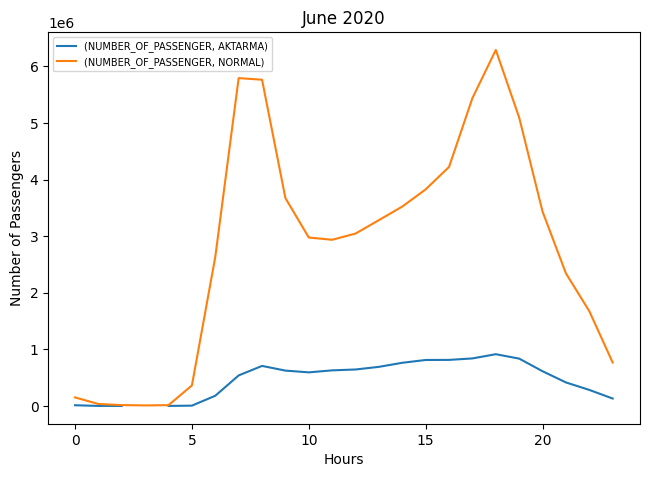

In [10]:
dfjfer.unstack().plot()
plt.tight_layout()
plt.title('June 2020')
plt.xlabel('Hours')
plt.ylabel('Number of Passengers')
plt.legend(fontsize = 7)

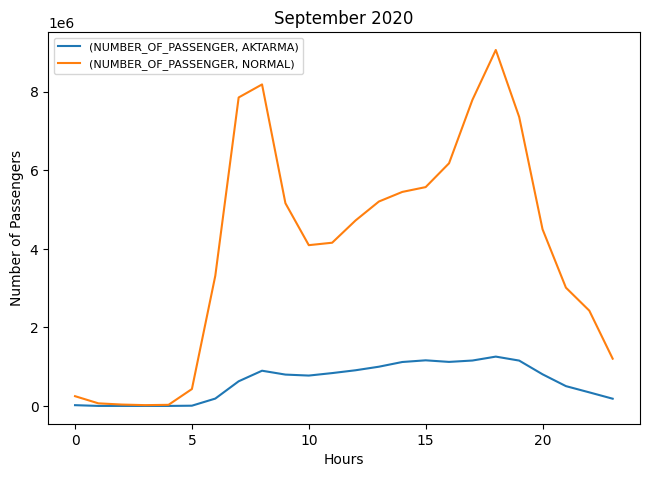

In [11]:
dfsfer.unstack().plot()
plt.tight_layout()
plt.title('September 2020')
plt.xlabel('Hours')
plt.ylabel('Number of Passengers')
plt.legend(fontsize = 8)

## QUESTION 1.4


In [12]:
def total_daily(dfs, calctype):
    df = dfs.copy()
    df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], infer_datetime_format=True)
    arr1 = df.groupby([df['DATE_TIME'].dt.day, df[calctype]]).NUMBER_OF_PASSENGER.sum()
    df1 = pd.DataFrame(arr1)
    return df1

In [13]:
sorted_total = total_daily(data_april, 'LINE').sort_values(['DATE_TIME', 'NUMBER_OF_PASSENGER'] ,ascending = [True, False])
sorted_total.reset_index(inplace = True)
sorted_total

,DATE_TIME,LINE,NUMBER_OF_PASSENGER
0,1,ÖHO,350599
1,1,İETT,165957
2,1,METROBÜS,118950
3,1,AKSARAY-HAVALİMANI,62308
4,1,MARMARAY,49819
...,...,...,...
461,30,KİRAZLI-OLİMPİYATKÖY,15133
462,30,ŞEHİR HATLARI,13020
463,30,MOTOR TEKNE,12626
464,30,LEVENT - RUMELİ HİSARÜSTÜ,1048


### Busiest lines in each day of April 2020

In [14]:
busiest_lines=[]
busiest_lines_index = sorted_total[sorted_total['DATE_TIME'].diff() != 0].index.tolist()
for i in busiest_lines_index:
    busiest_lines.append([sorted_total['DATE_TIME'][i],sorted_total['LINE'][i]])
busiest_lines

[[1, 'ÖHO'],
 [2, 'ÖHO'],
 [3, 'ÖHO'],
 [4, 'ÖHO'],
 [5, 'ÖHO'],
 [6, 'ÖHO'],
 [7, 'ÖHO'],
 [8, 'ÖHO'],
 [9, 'ÖHO'],
 [10, 'ÖHO'],
 [11, 'İETT'],
 [12, 'İETT'],
 [13, 'ÖHO'],
 [14, 'ÖHO'],
 [15, 'ÖHO'],
 [16, 'ÖHO'],
 [17, 'ÖHO'],
 [18, 'İETT'],
 [19, 'İETT'],
 [20, 'ÖHO'],
 [21, 'ÖHO'],
 [22, 'ÖHO'],
 [23, 'İETT'],
 [24, 'İETT'],
 [25, 'İETT'],
 [26, 'İETT'],
 [27, 'ÖHO'],
 [28, 'ÖHO'],
 [29, 'ÖHO'],
 [30, 'ÖHO']]

## QUESTION 1.5

In [15]:
def total_daily(dfs, calctype):

    if calctype == 'passengers':
        df = dfs.copy()
        df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], infer_datetime_format=True)
        arr1 = df.groupby(df['DATE_TIME'].dt.day).NUMBER_OF_PASSENGER.sum()
        df1 = pd.DataFrame(arr1)
        return df1
    elif calctype == 'passages':
        df = dfs.copy()
        df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], infer_datetime_format=True)
        arr2 = df.groupby(df['DATE_TIME'].dt.day).NUMBER_OF_PASSAGE.sum()
        df1 = pd.DataFrame(arr2)
        return df1

In [16]:
passenger = total_daily(data_august,'passengers')
passenger.reset_index(inplace = True)
passages = total_daily(data_august,'passages')
passages.reset_index(inplace = True)

dfp = pd.DataFrame()
dfp['PASSENGERS'] = passenger['NUMBER_OF_PASSENGER']
dfp['PASSAGES'] = passages['NUMBER_OF_PASSAGE']
dfp['DAY'] = passenger['DATE_TIME']
dfp.set_index('DAY', inplace = True)
dfp['RATIO'] = dfp['PASSENGERS'] / dfp['PASSAGES']
dfp

,PASSENGERS,PASSAGES,RATIO
DAY,,,
1,3175625,3864568,0.821728
2,3353801,4051211,0.827851
3,3326812,3902550,0.852471
4,3388301,3645945,0.929334
5,3490563,3743044,0.932547
6,3495338,3742428,0.933976
7,3520707,3770262,0.933810
8,2984185,3240121,0.921010
9,2304881,2558633,0.900825


### We understand that the capacity usage rate in public transportation is way more than enough since the public transportation never reaches its maximum capacity.  The public transportation can handle more people at this point.

# QUESTION 2 

In [17]:
with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    df = pd.read_csv(zf.open('fish_stableIsotopes_beaufort_stanek.csv'))
df

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN
0,ARCI005,Arctic Cisco,2018-08-11,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88
1,ARCI014,Arctic Cisco,2018-08-12,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16
2,ARCI021,Arctic Cisco,2017-08-06,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61
3,ARCI038,Arctic Cisco,2017-08-05,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90
4,ARCI040,Arctic Cisco,2017-08-09,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01
...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88
788,THST010,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98
789,THST011,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79
790,THST012,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
def grouped_loc_year(df, metric):
    df_sampled = df.groupby([df.Location, df.Date.dt.year])[metric].mean() 
    df_sampled = pd.DataFrame(df_sampled)
    return df_sampled

# QUESTION 2.1

In [113]:
df1 = grouped_loc_year(df,'mmLength')
df1

mmLength
Location         Date              
Jago Lagoon      2017.0  265.485714
                 2018.0  275.125000
                 2019.0  299.181818
Kaktovik Lagoon  2017.0  154.469697
                 2018.0  254.647727
                 2019.0  274.212121
Simpson Lagoon   2018.0  202.634146
                 2019.0  217.428571
Stefansson Sound 2018.0  220.860656
                 2019.0  235.557143

# QUESTION 2.2

In [114]:
df1.reset_index(inplace = True)

In [125]:
df1.dtypes
df1['Date'] = df1['Date'].astype(int)

In [126]:
stats.ttest_ind(df1['mmLength'][df1['Date'] == 2018], df1['mmLength'][df1['Date'] == 2019] )

Ttest_indResult(statistic=-0.7410632373864598, pvalue=0.4866347774569798)

### A two sample t-test is used to test whether or not the means of two populations are equal.The p value is much higher than statistically significant threshold levels therefore we reject the hypothesis 1 which means there is no statistically significant difference between 2018 and 2019

# QUESTION 2.3

In [117]:
df2 = grouped_loc_year(df,['d13C','d15N'])
df2

d13C       d15N
Location         Date                        
Jago Lagoon      2017.0 -21.995000  13.236000
                 2018.0 -21.835083  13.830750
                 2019.0 -21.864545  12.440545
Kaktovik Lagoon  2017.0 -20.663636  13.163030
                 2018.0 -20.745341  14.442500
                 2019.0 -20.207576  13.898485
Simpson Lagoon   2018.0 -22.200976  13.133659
                 2019.0 -21.727412  13.078941
Stefansson Sound 2018.0 -22.909836  12.842951
                 2019.0 -21.830429  13.308857

# QUESTION 2.4

In [118]:
df2.reset_index(inplace = True)

In [123]:
df2.dtypes
df2['Date'] = df2['Date'].astype(int)

In [124]:
stats.ttest_ind(df2['d13C'][df2['Date'] == 2018], df2['d13C'][df2['Date'] == 2019] )

Ttest_indResult(statistic=-0.853385586898686, pvalue=0.42619612261561235)

In [122]:
stats.ttest_ind(df2['d15N'][df2['Date'] == 2018], df2['d15N'][df2['Date'] == 2019] )

Ttest_indResult(statistic=0.8121114850982061, pvalue=0.44774133707624275)

### A two sample t-test is used to test whether or not the means of two populations are equal.The p value is much higher than statistically significant threshold levels therefore we reject the hypothesis 1 which means there is no statistically significant difference between 2018 and 2019

# QUESTION 2.5

### There is no value for 2017 for all locations therefore we cannot make comparison between 2017 against 2018 or 2019. We have to know the value of 2017 for Simpson Lagoon and Stefansson Sound.